### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.  
 Here is the code to load the data:  


In [94]:
import numpy as np  
import pandas as pd  
import scipy.stats as stats  
import matplotlib.pyplot as plt  
import sklearn  
from sklearn.datasets import load_boston  
boston = load_boston()  
bos = pd.DataFrame(boston.data)   

In [95]:
# statistical analysis
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
bos.shape

(506, 13)

In [97]:
bos.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [98]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [99]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [100]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [101]:
bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [102]:
print(boston.target.shape)

(506,)


In [103]:
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [104]:
bos.shape

(506, 14)

In [105]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

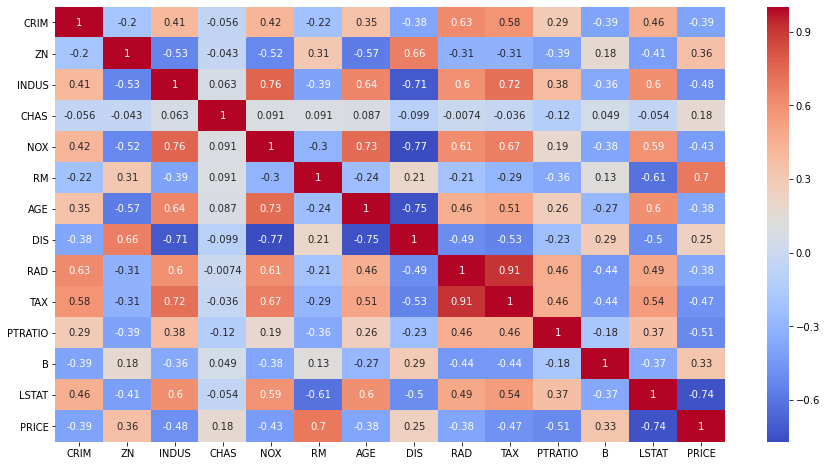

In [106]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(bos.corr(),cmap='coolwarm',annot=True)

In [109]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

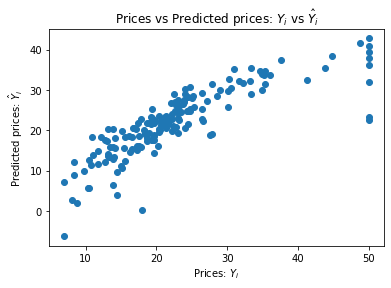

In [111]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [112]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974675


In [113]:
from sklearn import metrics
r_score=metrics.r2_score(Y_test,Y_pred)
print(r_score)

0.6956551656111597


In [114]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_with_constant)

In [115]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     77.10
Date:                Mon, 24 Aug 2020   Prob (F-statistic):           6.06e-91
Time:                        16:25:33   Log-Likelihood:                -984.91
No. Observations:                 339   AIC:                             1998.
Df Residuals:                     325   BIC:                             2051.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8589      5.830      5.636      0.000      21.390      44.328
CRIM          -0.1564      0.039     -4.022      0.000      -0.233      -0.080
ZN             0.0385      0.016      2.371      0.018       0.007       0.071
INDUS         -0.0251      0.071     -0.352      0.725      -0.165       0.115
CHAS           0.7864      1.047      0.751      0.453      -1.273       2.846
NOX          -12.9469      4.594     -2.818      0.005     -21.984      -3.909
RM             4.0027      0.478      8.380      0.000       3.063       4.942
AGE           -0.0116      0.015     -0.780      0.436      -0.041       0.018
DIS           -1.3683      0.238     -5.750      0.000      -1.836      -0.900
RAD            0.3418      0.084      4.072      0.000       0.177       0.507
TAX           -0.0135      0.005     -2.877      0.004      -0.023      -0.004
PTRATIO       -0.9889      0.152     -6.497      0.000      -1.288      -0.689
B              0.0121      0.003      3.762      0.000       0.006       0.018
LSTAT         -0.4726      0.060     -7.922      0.000      -0.590      -0.355
==============================================================================
Omnibus:                      112.211   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.704
Skew:                           1.369   Prob(JB):                    1.67e-102
Kurtosis:                       8.068   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### AdjustedR2 is 74.5 is good to accept.

### Assumptions

In [116]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

In [117]:
variables = X_scaled
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [118]:
vif

,VIF Factor,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


### Normality

In [125]:
residual = Y_test - Y_pred


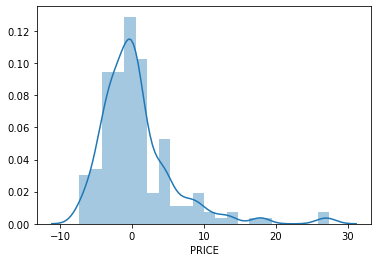

In [120]:
sns.distplot(residual)

## Anderson NOrmailty Test

In [122]:
df_results = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

In [126]:
from statsmodels.stats.diagnostic import normal_ad
print('Assumption 2: Checking error terms are normally distributed', '\n')
    
# Performing the test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', "p_value", p_value)
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

Assumption 2: Checking error terms are normally distributed 

p-value from the test - below 0.05 generally means non-normal: p_value 1.5356460019404576e-15
Residuals are not normally distributed


### Autocorrelation

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


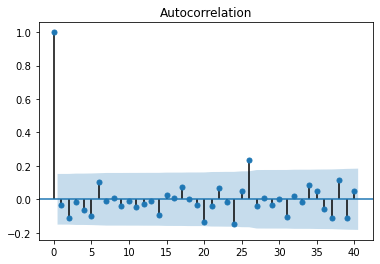

In [127]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

### Homoscadescity

In [ ]:
# Breusch-Pagan-Godfrey Test: Definition
# The Breusch-Pagan-Godfrey Test (sometimes shorted to the Breusch-Pagan test) is a test for heteroscedasticity of errors. 
# The null hypothesis for this test is that the error variances are all equal(constant).
# The alternate hypothesis is that the error variances are not equal. 
# More specifically, as Y increases, the variances increase (or decrease).

In [129]:
residuals = results.resid**2
model_2 = sm.OLS(residuals, Y_train)

## R square should as low as possible
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.199
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              83.79
Date:                Mon, 24 Aug 2020   Prob (F-statistic):                    5.36e-18
Time:                        16:50:59   Log-Likelihood:                         -1805.2
No. Observations:                 339   AIC:                                      3612.
Df Residuals:                     338   BIC:                                      3616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PRICE          1.0207      0.112      9.154      0.000       0.801       1.240
==============================================================================
Omnibus:                      512.731   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98952.114
Skew:                           7.797   Prob(JB):                         0.00
Kurtosis:                      85.233   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# the last value is p value and greater than 0.05 means accepting null hypothesiss
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, results.model.exog)
bp_test

(36.22185283607068,
 0.0005480687968479951,
 2.9907915395607767,
 0.00036662195595221666)

### Checking Accuracy with train and Test

In [131]:
regression = LinearRegression()

regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
regression.score(X_train,Y_train)

0.7551332741779998

In [133]:
regression.score(X_test,Y_test)

0.6956551656111597

#### Lasso

In [136]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [137]:
alpha = lasscv.alpha_
alpha

0.0003592777392721856

In [138]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.0003592777392721856, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
lasso_reg.score(X_test, Y_test)

0.6954874342143044

#### Ridge 

In [142]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([6.67511, 1.87747, 3.17039, 9.21066, 3.00133, 1.36297, 2.36305,
       1.26938, 9.64981, 8.22058, 7.84192, 1.83762, 2.94922, 2.30912,
       9.99553, 1.30884, 5.47785, 7.06683, 3.43458, 2.08515, 4.59523,
       5.06229, 5.91477, 9.84284, 1.12157, 5.17166, 5.70115, 3.17326,
       1.0418...356, 6.31534,
       5.96715, 3.97255, 9.60381, 0.15139, 4.51015, 9.34243, 1.37557,
       1.64785]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [143]:
ridgecv.alpha_

0.1513896916715518

In [144]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.1513896916715518, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [145]:
ridge_model.score(X_test, Y_test)

0.6938279825249979

#### ElasticNet

In [146]:

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [147]:
elasticCV.alpha_

1.510023901636777

In [148]:
elasticCV.l1_ratio

0.5

In [149]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, Y_train)

ElasticNet(alpha=1.510023901636777, copy_X=True, fit_intercept=True,
      l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [150]:
elasticnet_reg.score(X_test, Y_test)

0.6314079798354757

### We are getting same score from all the models. 